In [1]:
import os
import json

data_disk_dir = "autodl-tmp" # 数据盘dir（云GPU平台）
model_name = "zh2ko_based_on_nllb-200-distilled-600M"
check_point_name = "checkpoint-315000"
trainer_state_dir = os.path.join(data_disk_dir, model_name, check_point_name, "trainer_state.json")

# 打开文件并读取数据
with open(trainer_state_dir, 'r') as f:
    data = json.load(f)

data

{'best_metric': 0.03370169922709465,
 'best_model_checkpoint': 'autodl-tmp/zh2ko_based_on_nllb-200-distilled-600M/checkpoint-315000',
 'epoch': 3.0,
 'eval_steps': 21000,
 'global_step': 315000,
 'is_hyper_param_search': False,
 'is_local_process_zero': True,
 'is_world_process_zero': True,
 'log_history': [{'epoch': 0.2,
   'grad_norm': 0.279016375541687,
   'learning_rate': 3.332063492063493e-05,
   'loss': 1.2474,
   'step': 21000},
  {'epoch': 0.2,
   'eval_loss': 0.050068024545907974,
   'eval_runtime': 625.5728,
   'eval_samples_per_second': 23.978,
   'eval_steps_per_second': 23.978,
   'step': 21000},
  {'epoch': 0.4,
   'grad_norm': 0.11398600041866302,
   'learning_rate': 4.815097001763669e-05,
   'loss': 0.0538,
   'step': 42000},
  {'epoch': 0.4,
   'eval_loss': 0.04469678923487663,
   'eval_runtime': 625.2955,
   'eval_samples_per_second': 23.989,
   'eval_steps_per_second': 23.989,
   'step': 42000},
  {'epoch': 0.6,
   'grad_norm': 0.06369128823280334,
   'learning_rate'

In [2]:
import pandas as pd

df = pd.DataFrame(data["log_history"])
df

,epoch,grad_norm,learning_rate,loss,step,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.2,0.279016,3.332063e-05,1.2474,21000,NaN,NaN,NaN,NaN
1,0.2,NaN,NaN,NaN,21000,0.050068,625.5728,23.978,23.978
2,0.4,0.113986,4.815097e-05,0.0538,42000,NaN,NaN,NaN,NaN
3,0.4,NaN,NaN,NaN,42000,0.044697,625.2955,23.989,23.989
4,0.6,0.063691,4.444832e-05,0.0485,63000,NaN,NaN,NaN,NaN
5,0.6,NaN,NaN,NaN,63000,0.041781,625.3870,23.985,23.985
6,0.8,0.036339,4.074586e-05,0.0454,84000,NaN,NaN,NaN,NaN
7,0.8,NaN,NaN,NaN,84000,0.039563,625.1974,23.992,23.992
8,1.0,0.081370,3.704374e-05,0.0439,105000,NaN,NaN,NaN,NaN
9,1.0,NaN,NaN,NaN,105000,0.038448,625.1174,23.995,23.995


In [3]:
df.set_index('epoch', inplace=True)
df = df.groupby(level=0).first()
df.reset_index(inplace=True)
df

,epoch,grad_norm,learning_rate,loss,step,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.2,0.279016,3.332063e-05,1.2474,21000,0.050068,625.5728,23.978,23.978
1,0.4,0.113986,4.815097e-05,0.0538,42000,0.044697,625.2955,23.989,23.989
2,0.6,0.063691,4.444832e-05,0.0485,63000,0.041781,625.3870,23.985,23.985
3,0.8,0.036339,4.074586e-05,0.0454,84000,0.039563,625.1974,23.992,23.992
4,1.0,0.081370,3.704374e-05,0.0439,105000,0.038448,625.1174,23.995,23.995
5,1.2,0.139035,3.334127e-05,0.0382,126000,0.037444,625.1823,23.993,23.993
6,1.4,0.203108,2.963898e-05,0.0373,147000,0.036694,625.3038,23.988,23.988
7,1.6,0.148006,2.593633e-05,0.0371,168000,0.036033,625.3573,23.986,23.986
8,1.8,0.194822,2.223422e-05,0.0363,189000,0.035323,625.1514,23.994,23.994
9,2.0,0.092241,1.853210e-05,0.0364,210000,0.034650,625.3301,23.987,23.987


In [4]:
df = df.iloc[1:]
df

,epoch,grad_norm,learning_rate,loss,step,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
1,0.4,0.113986,4.815097e-05,0.0538,42000,0.044697,625.2955,23.989,23.989
2,0.6,0.063691,4.444832e-05,0.0485,63000,0.041781,625.3870,23.985,23.985
3,0.8,0.036339,4.074586e-05,0.0454,84000,0.039563,625.1974,23.992,23.992
4,1.0,0.081370,3.704374e-05,0.0439,105000,0.038448,625.1174,23.995,23.995
5,1.2,0.139035,3.334127e-05,0.0382,126000,0.037444,625.1823,23.993,23.993
6,1.4,0.203108,2.963898e-05,0.0373,147000,0.036694,625.3038,23.988,23.988
7,1.6,0.148006,2.593633e-05,0.0371,168000,0.036033,625.3573,23.986,23.986
8,1.8,0.194822,2.223422e-05,0.0363,189000,0.035323,625.1514,23.994,23.994
9,2.0,0.092241,1.853210e-05,0.0364,210000,0.034650,625.3301,23.987,23.987
10,2.2,0.210933,1.482963e-05,0.0310,231000,0.034662,625.2515,23.990,23.990


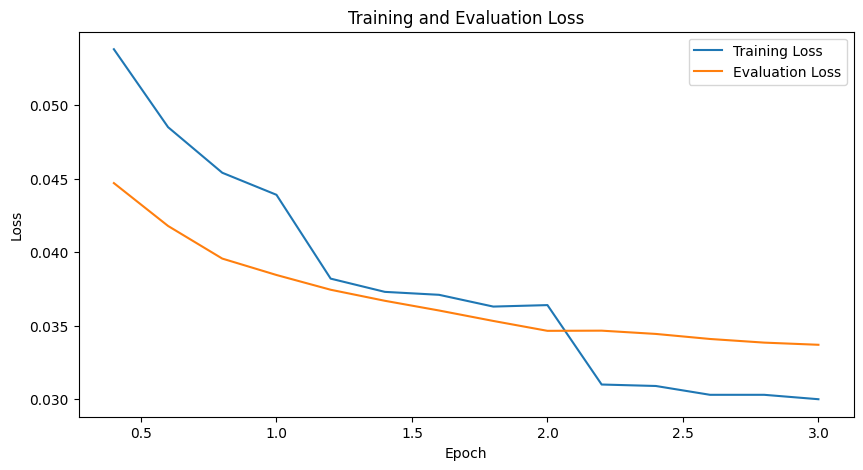

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['loss'], label='Training Loss')
plt.plot(df['epoch'], df['eval_loss'], label='Evaluation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()